![My Image](banknote.jpg)

### Domain: Bank Note Authentication

**Objective**: #In this notebook we are going to classfication of notes as original(1) or Duplicate(0) on the basis of different feature(Variance, Skewness, Curtosis, Entropy).
We will be using pandas, matplotlib, seaborn, tensorflow, scikit-learn .

First we will clean our data(remove outliers) then we will train our models, predict the class and then check accuracy of our models.
Our goal is to create an accurate deep learning model that can classify the bank note using the given data.



**Data Dictionary:**

* variance: variance of Wavelet Transformed image (continuous)\
* skewness: skewness of Wavelet Transformed image (continuous)\
* curtosis: curtosis of Wavelet Transformed image (continuous)\
* entropy: entropy of image (continuous)\
* class: class (integer)\
Where class indicates whether or not a Bank Note was authentic.


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pandas to read in the bank_note_data.csv file
df=pd.read_csv('/Users/jensontmathew/Downloads/Dataset/BankNote_Authentication.csv')

In [3]:
#  Check the head of the Data
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# data description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [5]:
# infromation about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.shape

(1372, 5)

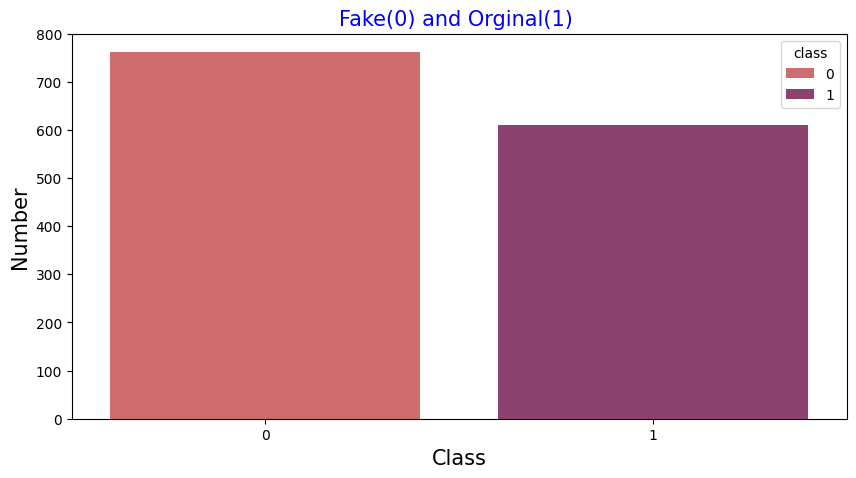

In [7]:
#countplot
plt.figure(figsize=(10,5))
sns.countplot(x='class',data=df,hue='class',palette='flare')
plt.title('Fake(0) and Orginal(1) ',fontdict={'size':15,'color':'blue'})
plt.xlabel('Class',fontsize=15,)
plt.ylabel('Number',fontsize=15)
plt.show()

In [8]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


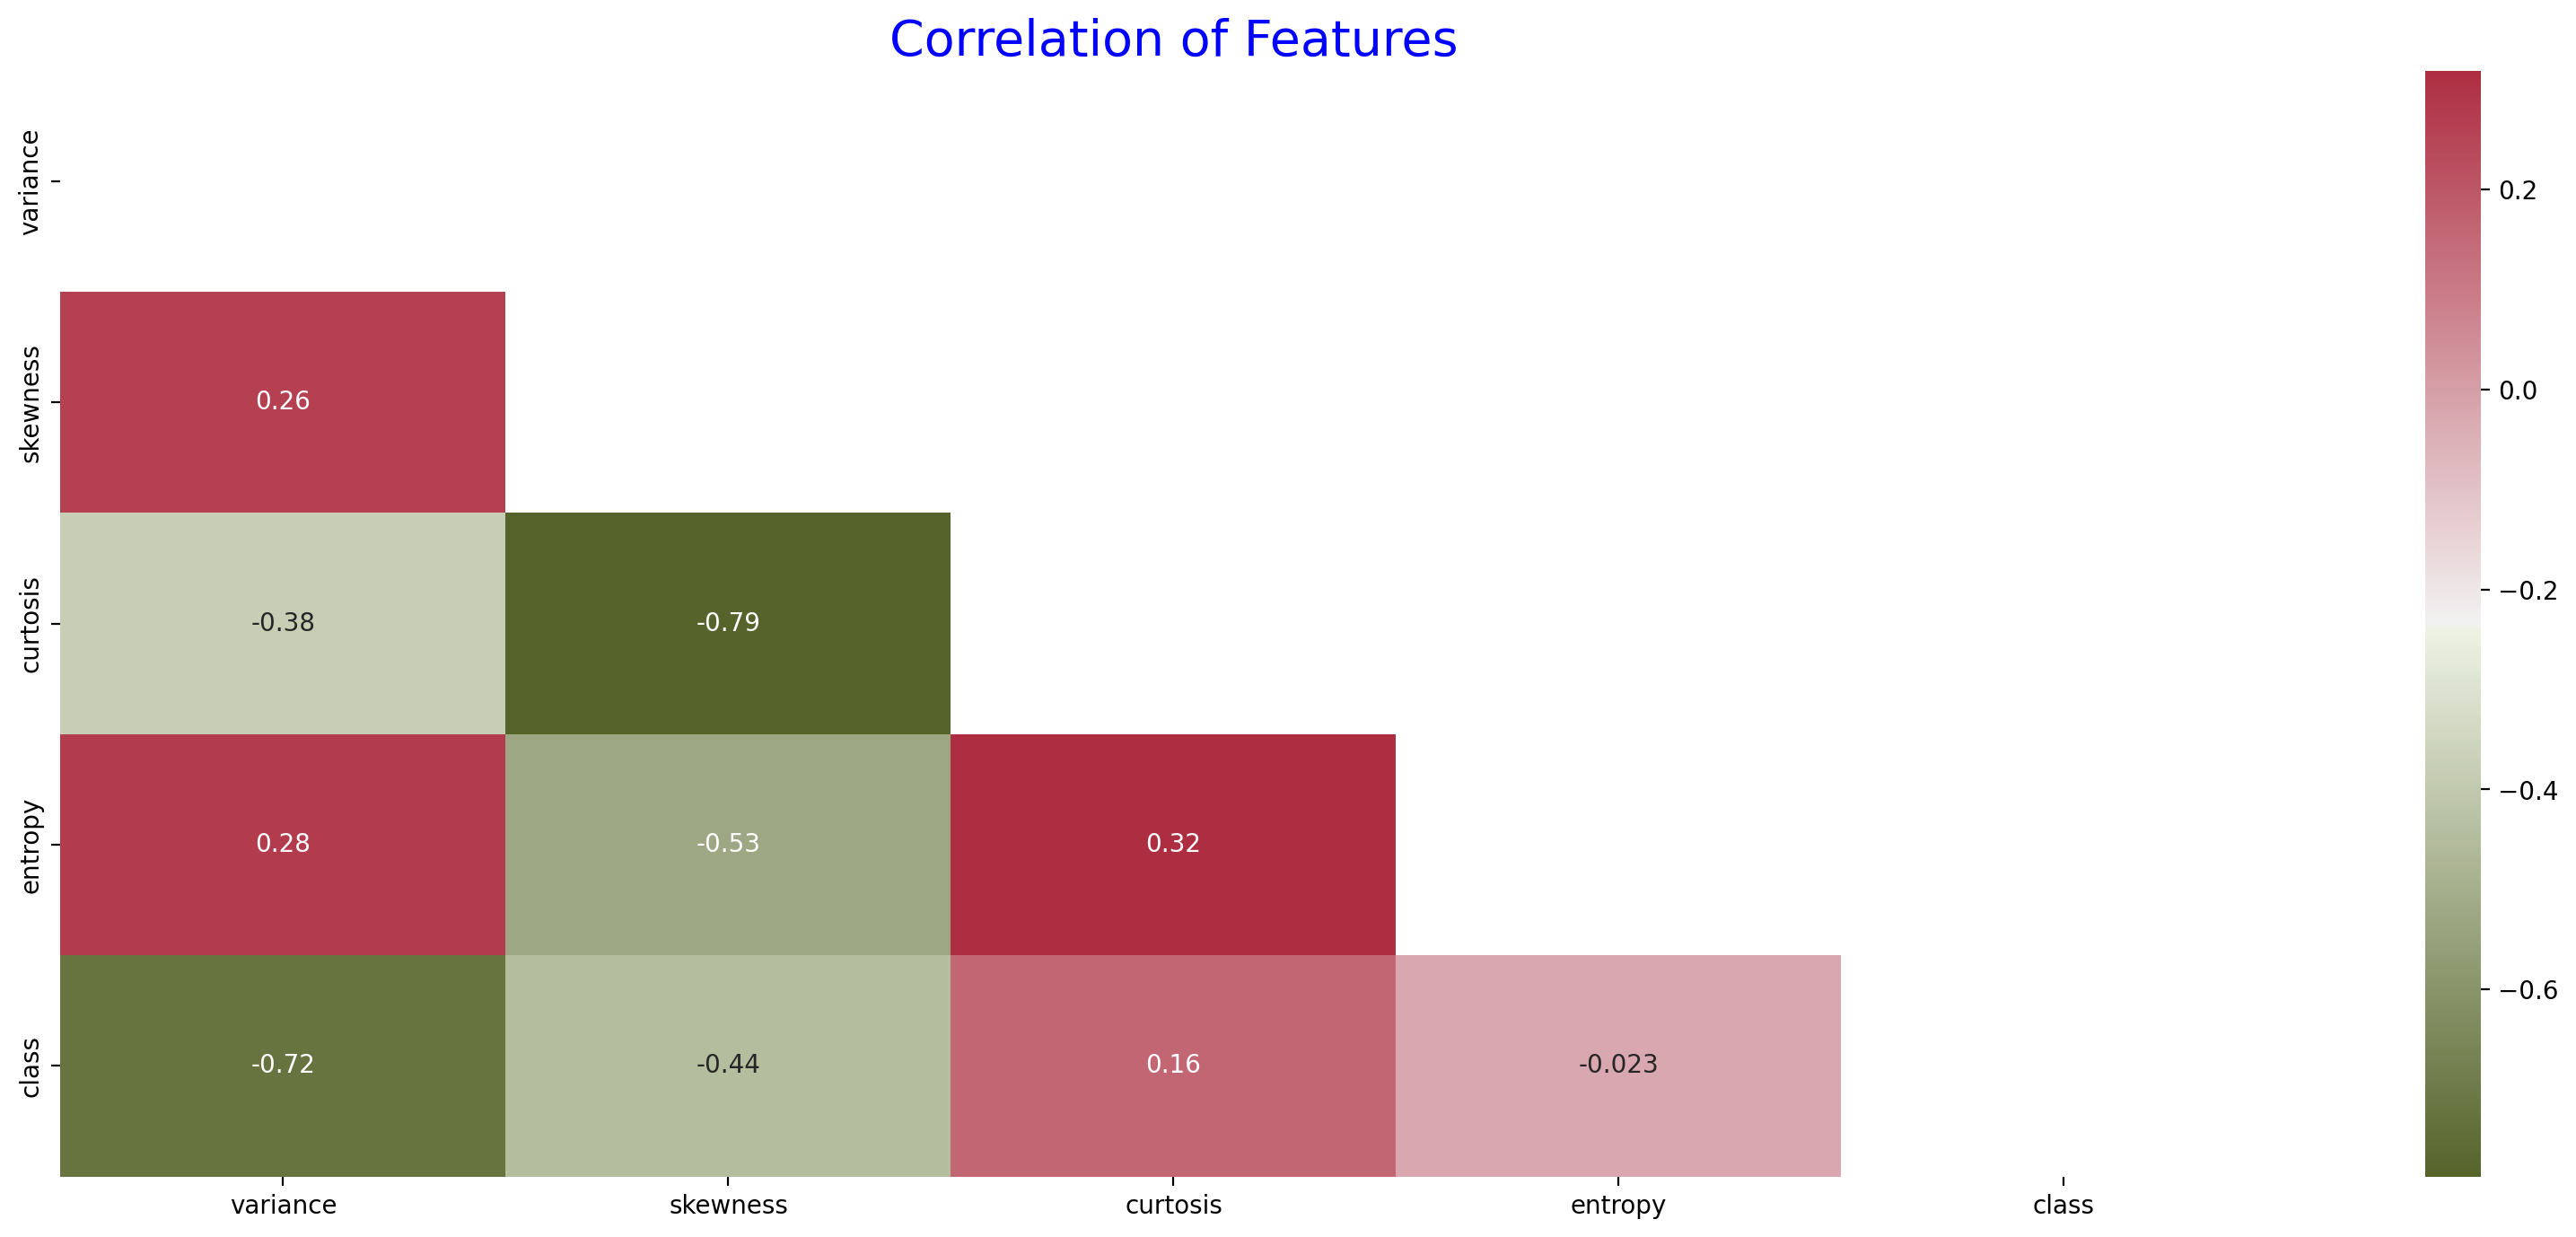

In [9]:
plt.figure(figsize=(20,8),dpi=200)
corr=df.corr(numeric_only=True)
cmap=sns.diverging_palette(100,7,s=75,l=40,n=25,center='light',as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr,mask=matrix,annot=True,cmap=cmap)
plt.title('Correlation of Features',fontdict={'size':20,'color':'blue'})
plt.show()

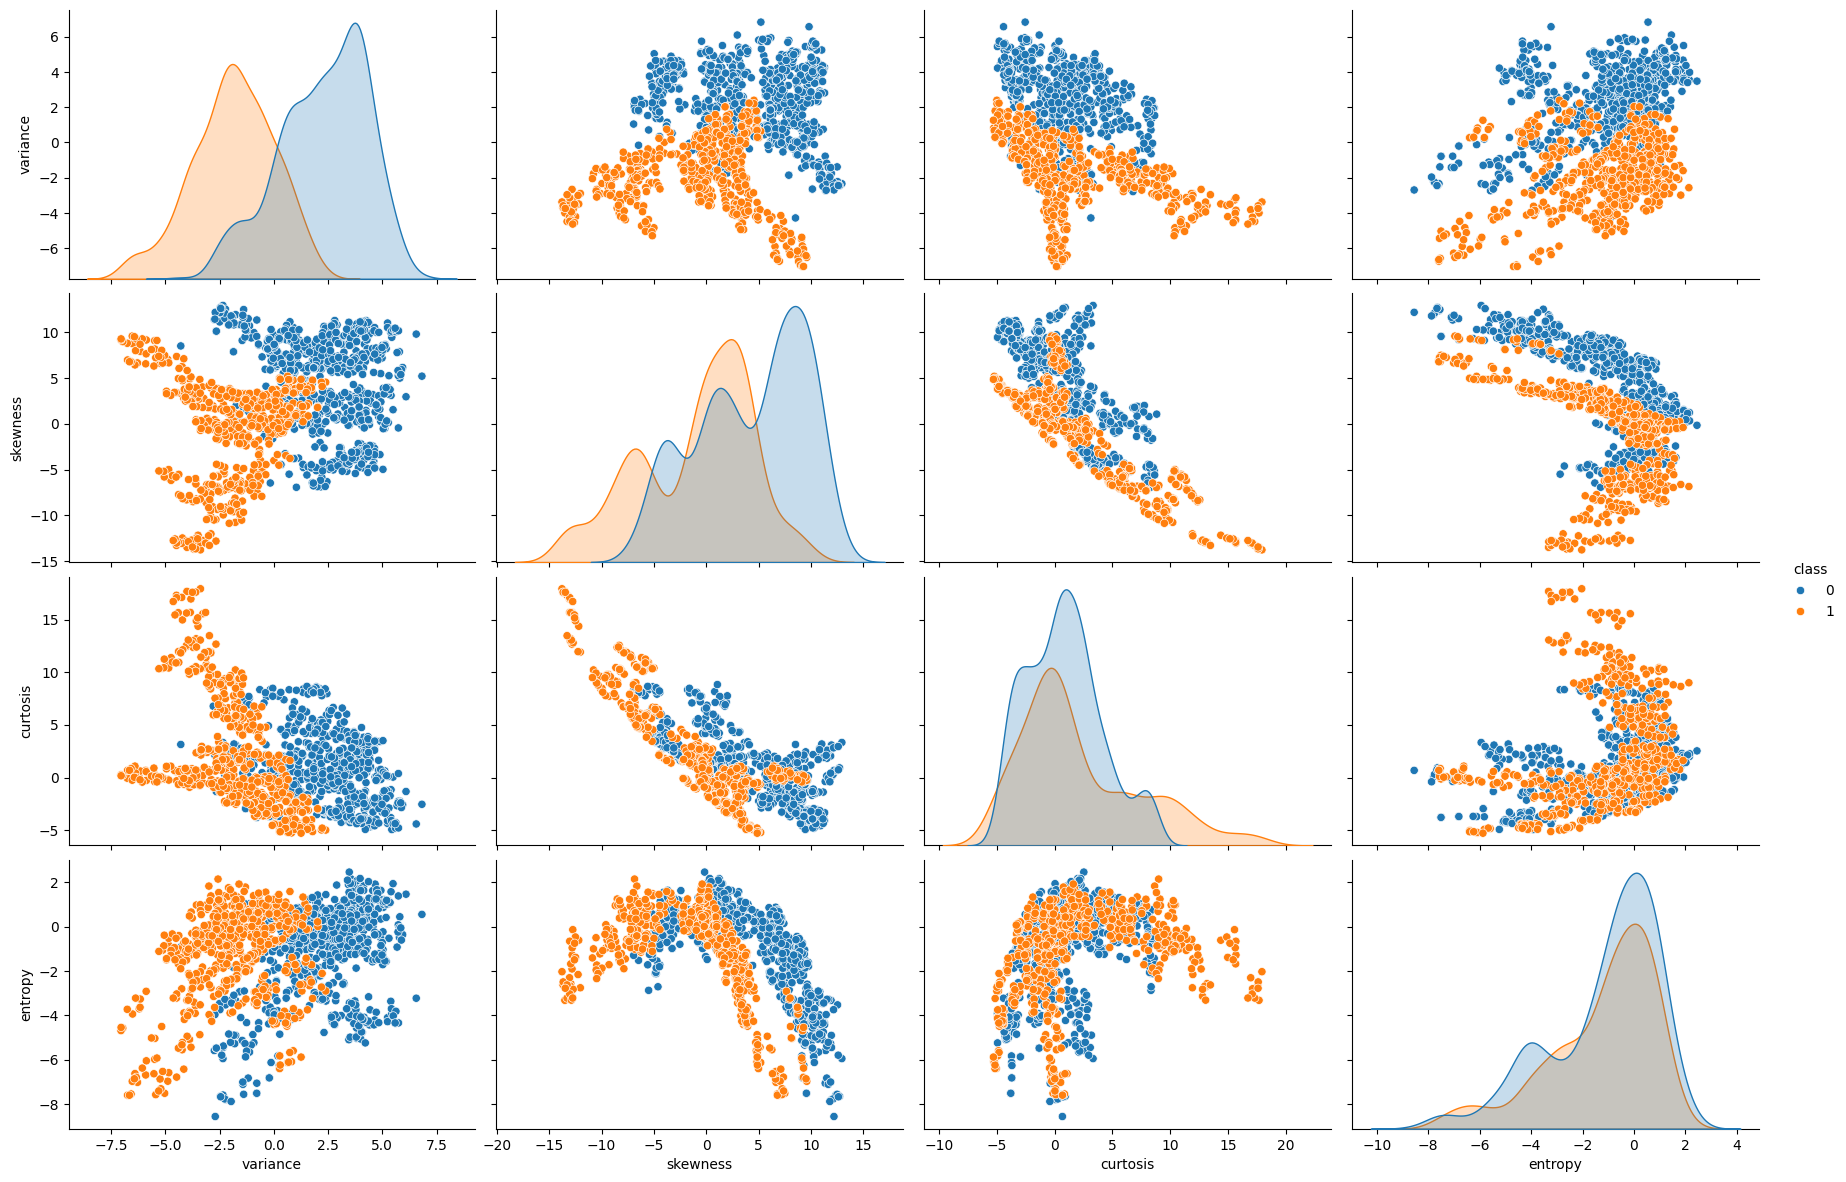

In [10]:
sns.pairplot(data=df,hue='class',height=3,aspect=1.5)

In [11]:
#Splitting the data
# x=df.drop('class',axis=1)
# y=df['class']

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
#Creating a model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=30)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [16]:
#Checking score
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
print(f'R2 Score is {r2_score(y_test,y_pred)}')

R2 Score is 0.9803374137972176


In [17]:
print(f'mean absolute error is {mean_absolute_error(y_test,y_pred)}')

mean absolute error is 0.0048543689320388345


In [19]:
#saving the model
import pickle

with open('model.pkl','wb') as saved_model:
    pickle.dump(model,saved_model)

In [22]:
#taking input from the user
variance=float(input('Enter the variance '))
skewness=float(input('Enter the skewness '))
curtosis=float(input('Enter the curtosis '))
entropy=float(input('Enter the entropy '))

Enter the variance -1.39710
Enter the skewness 3.31910
Enter the curtosis -1.392700
Enter the entropy -1.99480


In [23]:
user_input=[[variance,skewness,curtosis,entropy]]

In [24]:
#predicting using the saved_model

with open('model.pkl','rb') as saved_model:
    loaded_model=pickle.load(saved_model)

In [25]:
predicted_class=loaded_model.predict(user_input)

In [26]:
print(f"The predicted class is: {predicted_class[0]}")


The predicted class is: 1
